In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

import seaborn as sns

In [33]:
def show_graphics(df: pd.DataFrame, col: str, fecha: str):
    period = 24 * 365
    decomposition_air = seasonal_decompose(df[col], model='additive', period=period)
    plt.figure(figsize=(18, 16))

    plt.subplot(4, 1, 1)
    plt.plot(df[fecha], df[col])
    plt.title('Original TS')

    plt.subplot(4, 1, 2)
    plt.plot(df[fecha], decomposition_air.trend, label='Trend')
    plt.legend(loc='upper left')
    plt.title('Trend Component')

    plt.subplot(4, 1, 3)
    plt.plot(df[fecha], decomposition_air.seasonal, label='Seasonality')
    plt.legend(loc='upper left')
    plt.title('Seasonal Component')

    plt.subplot(4, 1, 4)
    plt.plot(df[fecha], decomposition_air.resid, label='Residual')
    plt.legend(loc='upper left')
    plt.title('Residual Component')

    plt.tight_layout()
    plt.show()

In [34]:
df = pd.read_csv('../../data/homogenized/madrid_data/homogenized_data.csv', parse_dates=['Fecha'])
df.sort_values(by=['Fecha','Hora'], ascending=True, inplace=True)
df = df.dropna()
df

,Fecha,Hora,ESTACION_x,HUMEDAD RELATIVA,TEMPERATURA
0,2019-01-01,0,102,50.0,3.1
1,2019-01-01,1,102,49.0,2.9
2,2019-01-01,2,102,46.0,3.1
3,2019-01-01,3,102,51.0,1.9
4,2019-01-01,4,102,56.0,0.7
...,...,...,...,...,...
53324,2025-01-30,20,102,46.0,3.4
53325,2025-01-30,21,102,50.0,2.5
53326,2025-01-30,22,102,50.0,2.4
53327,2025-01-30,23,102,52.0,2.0


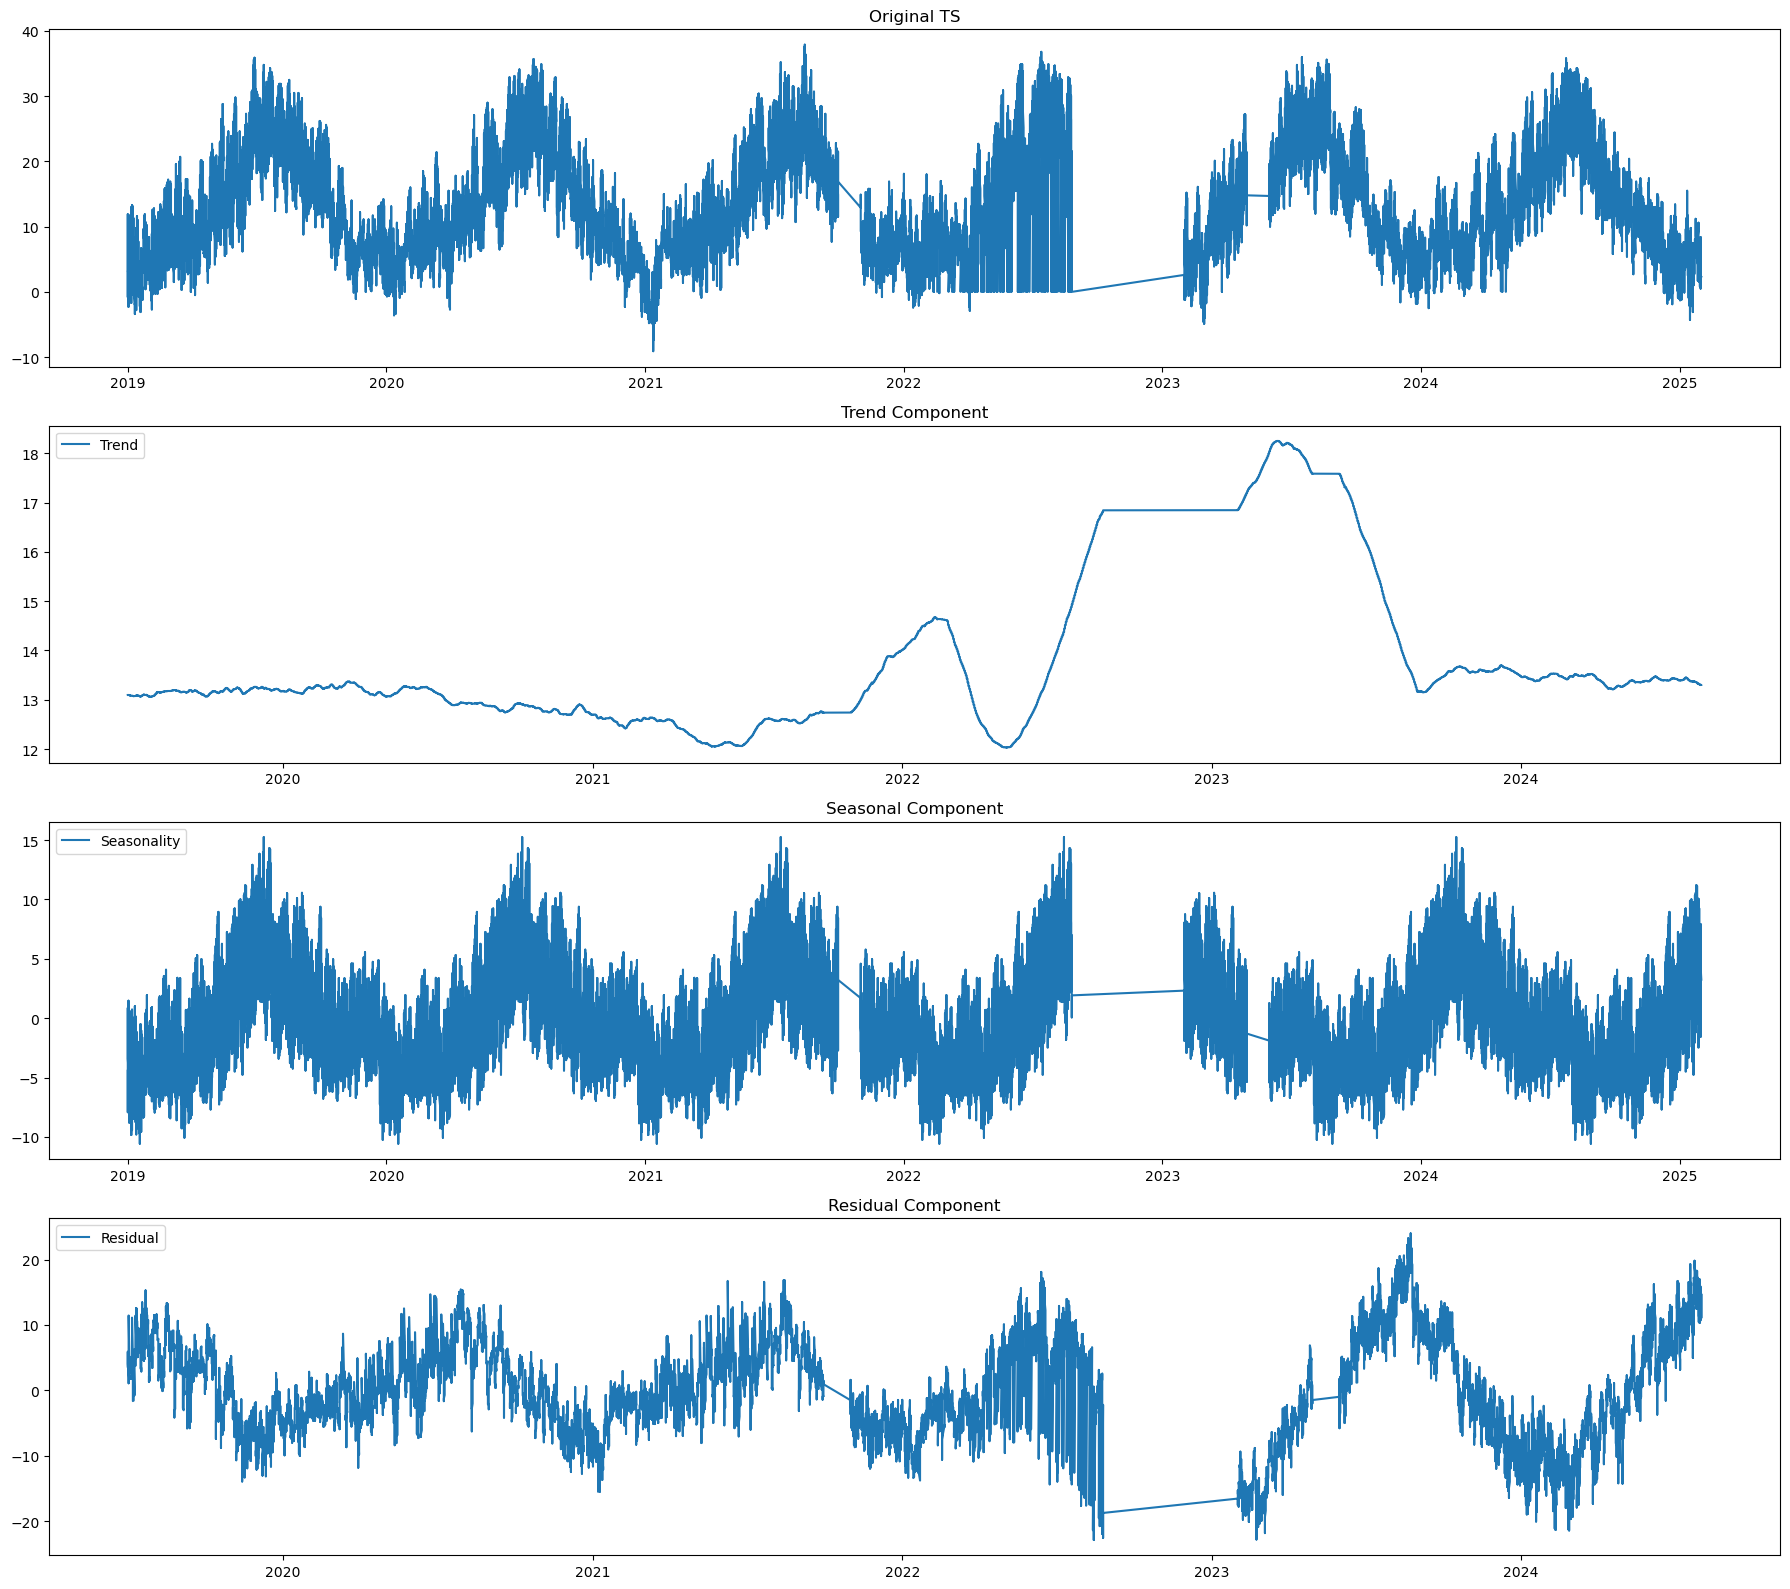

In [35]:
show_graphics(df=df, col='TEMPERATURA', fecha='Fecha')

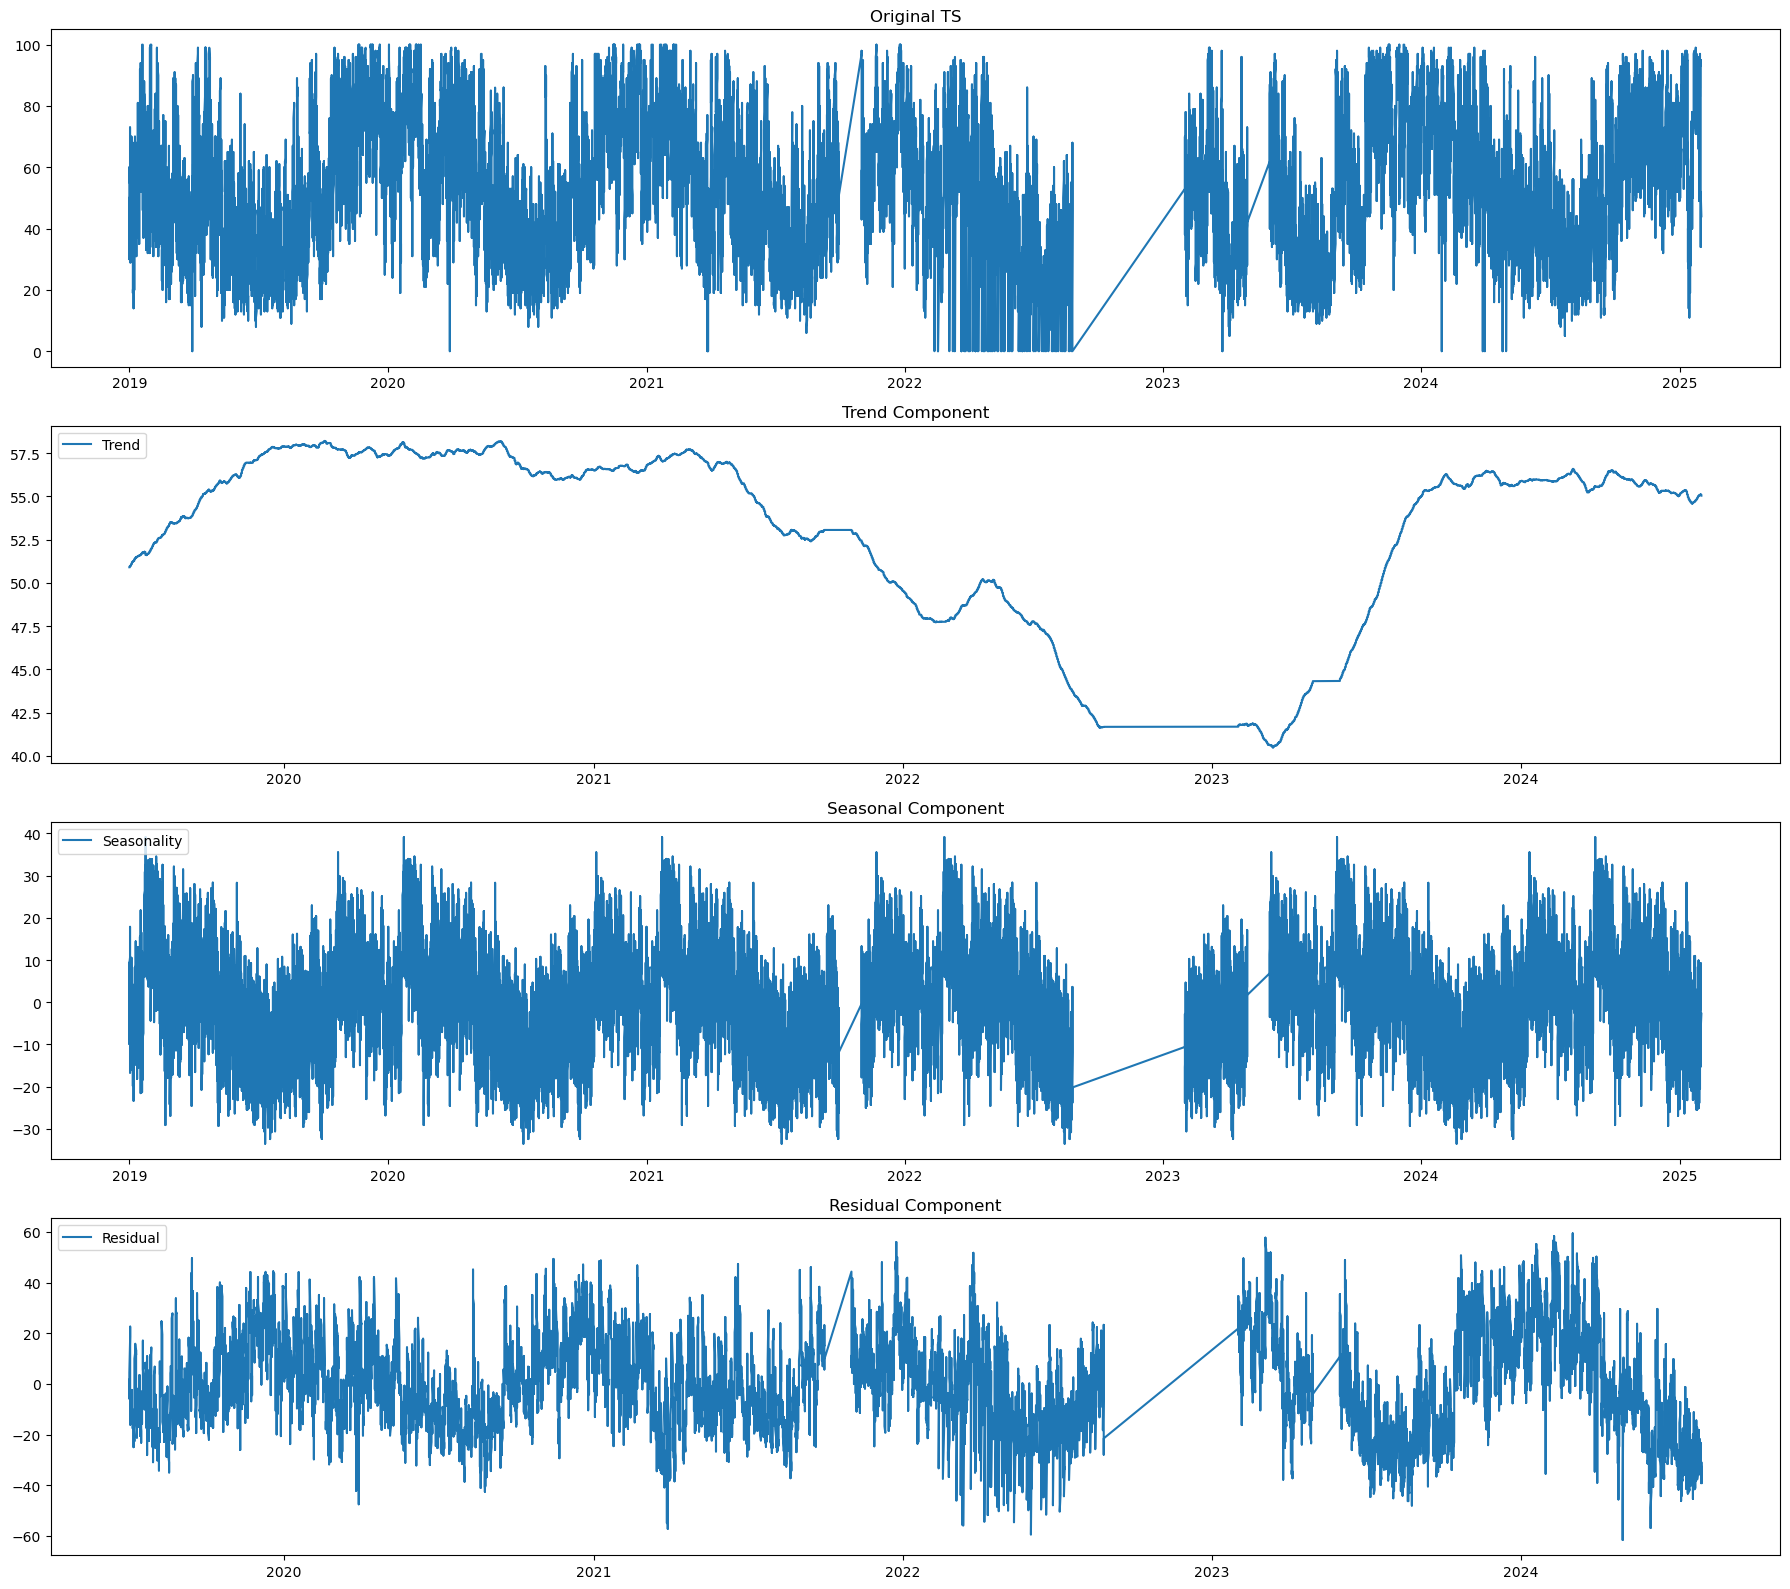

In [36]:
show_graphics(df=df, col='HUMEDAD RELATIVA', fecha='Fecha')

# TRANSFORMADOS

In [37]:
df = pd.read_csv('../../data/transformed/madrid_data/transformed_data.csv', parse_dates=['fecha'])
df.sort_values(by=['fecha','hora'], ascending=True, inplace=True)
df

,fecha,hora,indicativo,humedad_media,temperatura_media,anho,mes,dia
0,2019-01-01,0,102,50.0,3.1,2019,1,1
1,2019-01-01,1,102,49.0,2.9,2019,1,1
2,2019-01-01,2,102,46.0,3.1,2019,1,1
3,2019-01-01,3,102,51.0,1.9,2019,1,1
4,2019-01-01,4,102,56.0,0.7,2019,1,1
...,...,...,...,...,...,...,...,...
53324,2025-01-30,20,102,46.0,3.4,2025,1,30
53325,2025-01-30,21,102,50.0,2.5,2025,1,30
53326,2025-01-30,22,102,50.0,2.4,2025,1,30
53327,2025-01-30,23,102,52.0,2.0,2025,1,30


## TEMPERATURA MEDIA

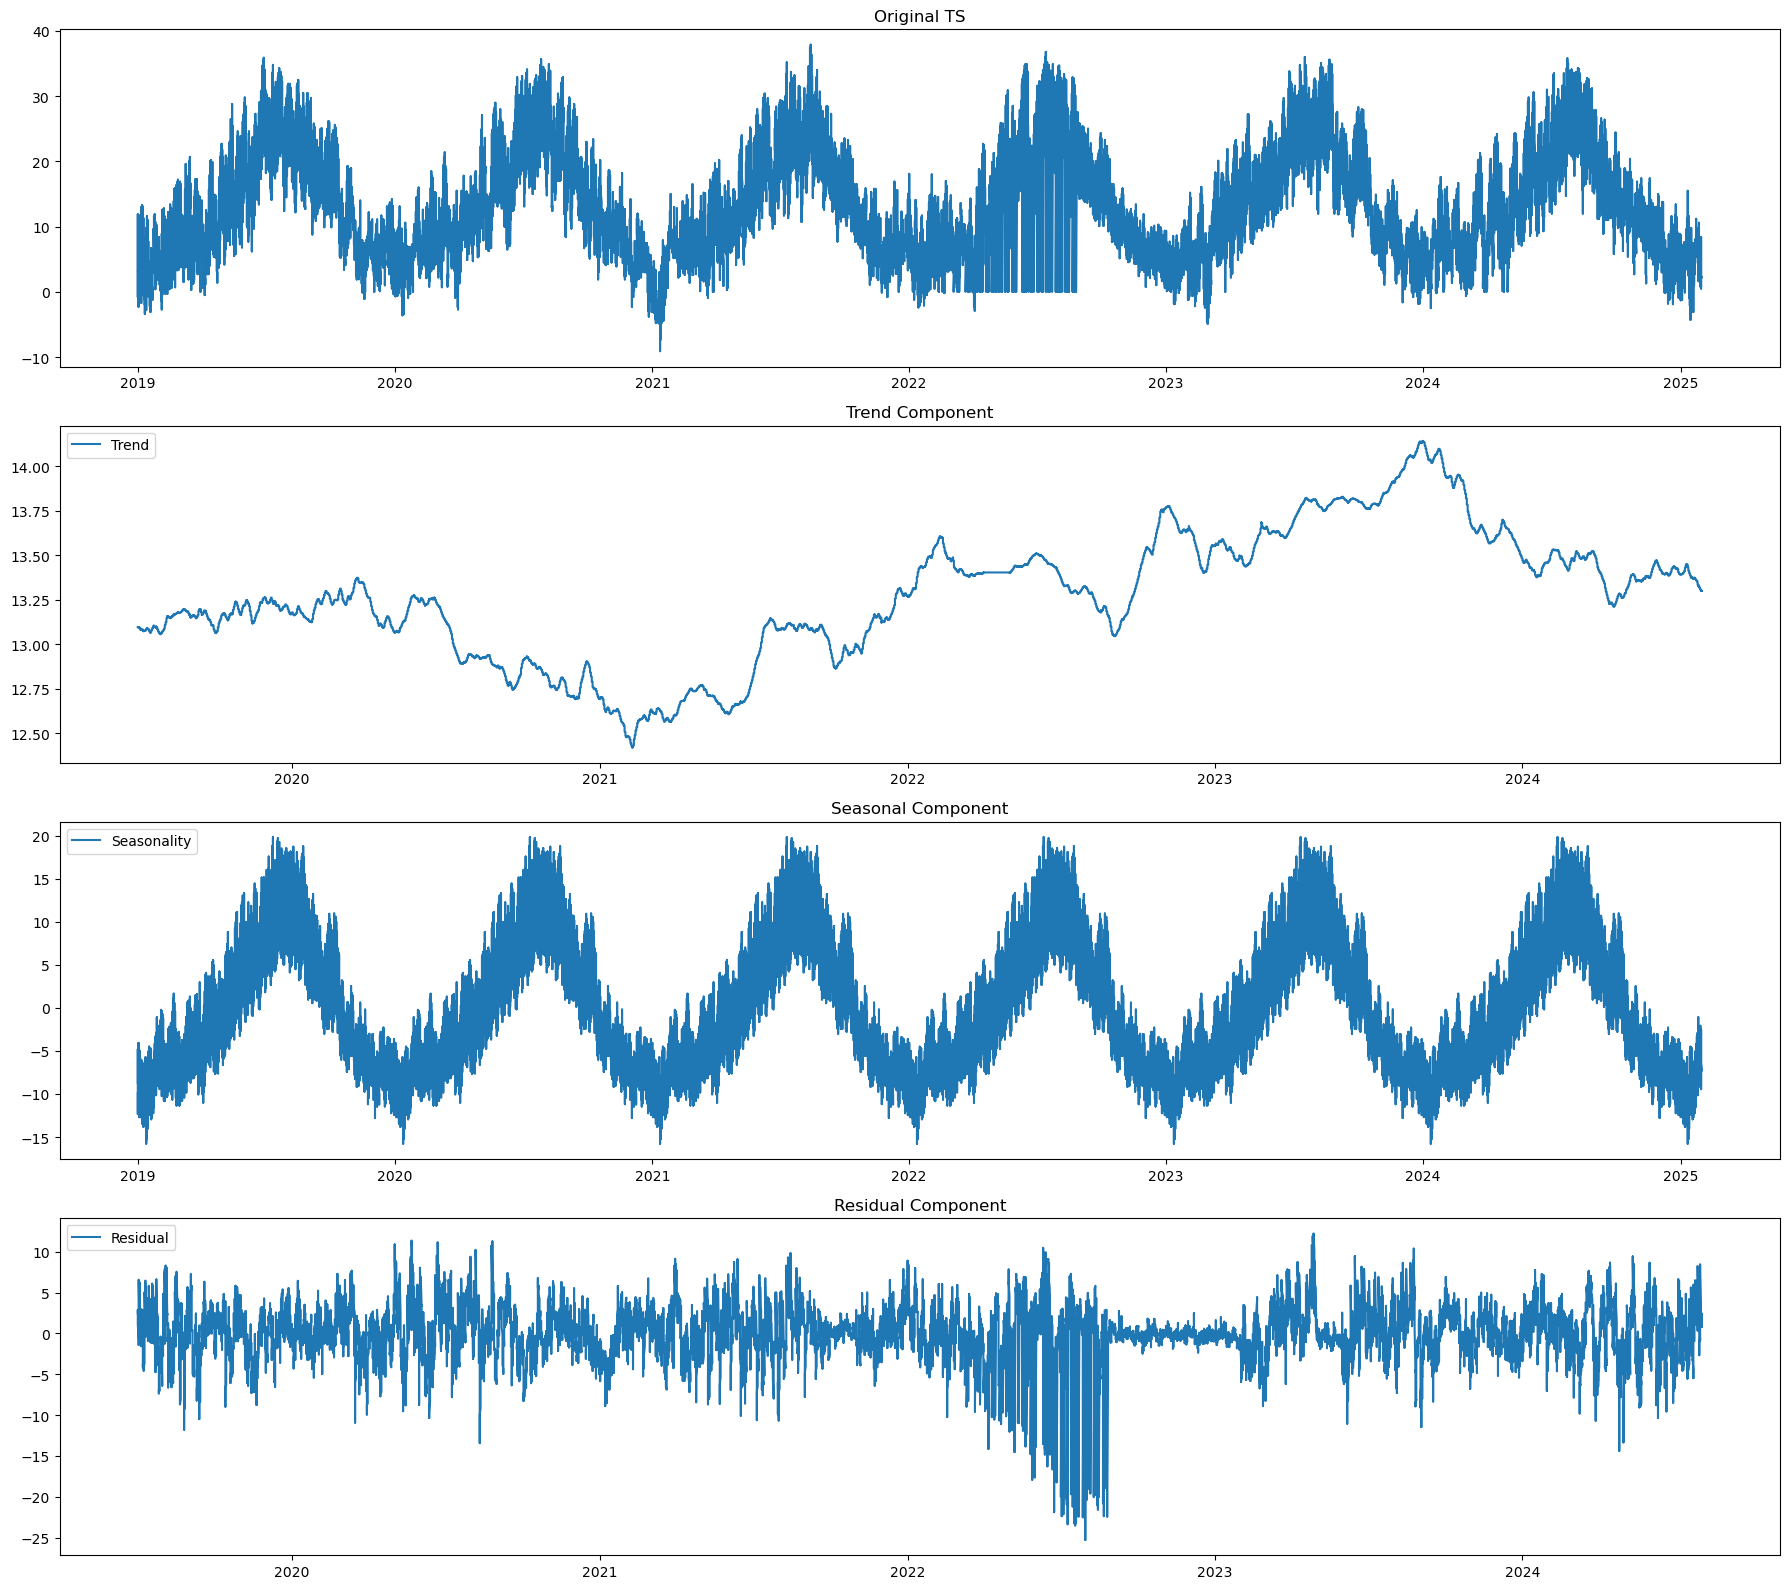

In [38]:
show_graphics(df=df, col='temperatura_media', fecha='fecha')

### 2. Análisis por Hora del Día, Mes

<Axes: xlabel='hora', ylabel='temperatura_media'>

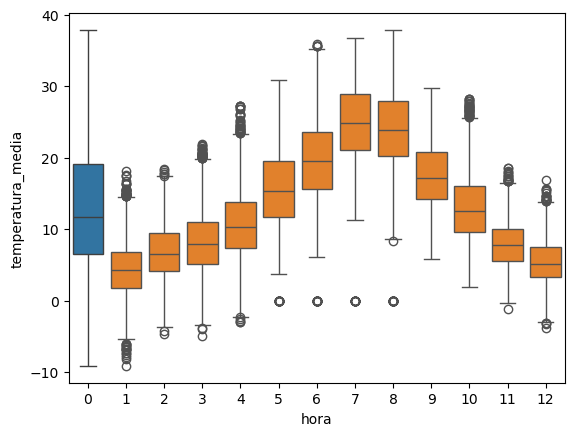

In [44]:
# Boxplot por hora
sns.boxplot(x='hora', y='temperatura_media', data=df)

# Por mes
sns.boxplot(x='mes', y='temperatura_media', data=df)

### 5. Estudio de Máximos/Mínimos por Periodo

<Axes: xlabel='dia'>

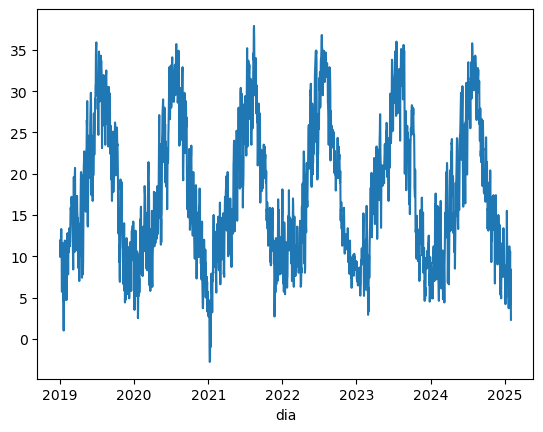

In [ ]:
df['dia'] = df['fecha'].dt.date
daily_max_temp = df.groupby('dia')['temperatura_media'].max()
daily_max_temp.plot()

## HUMEDAD_MEDIA

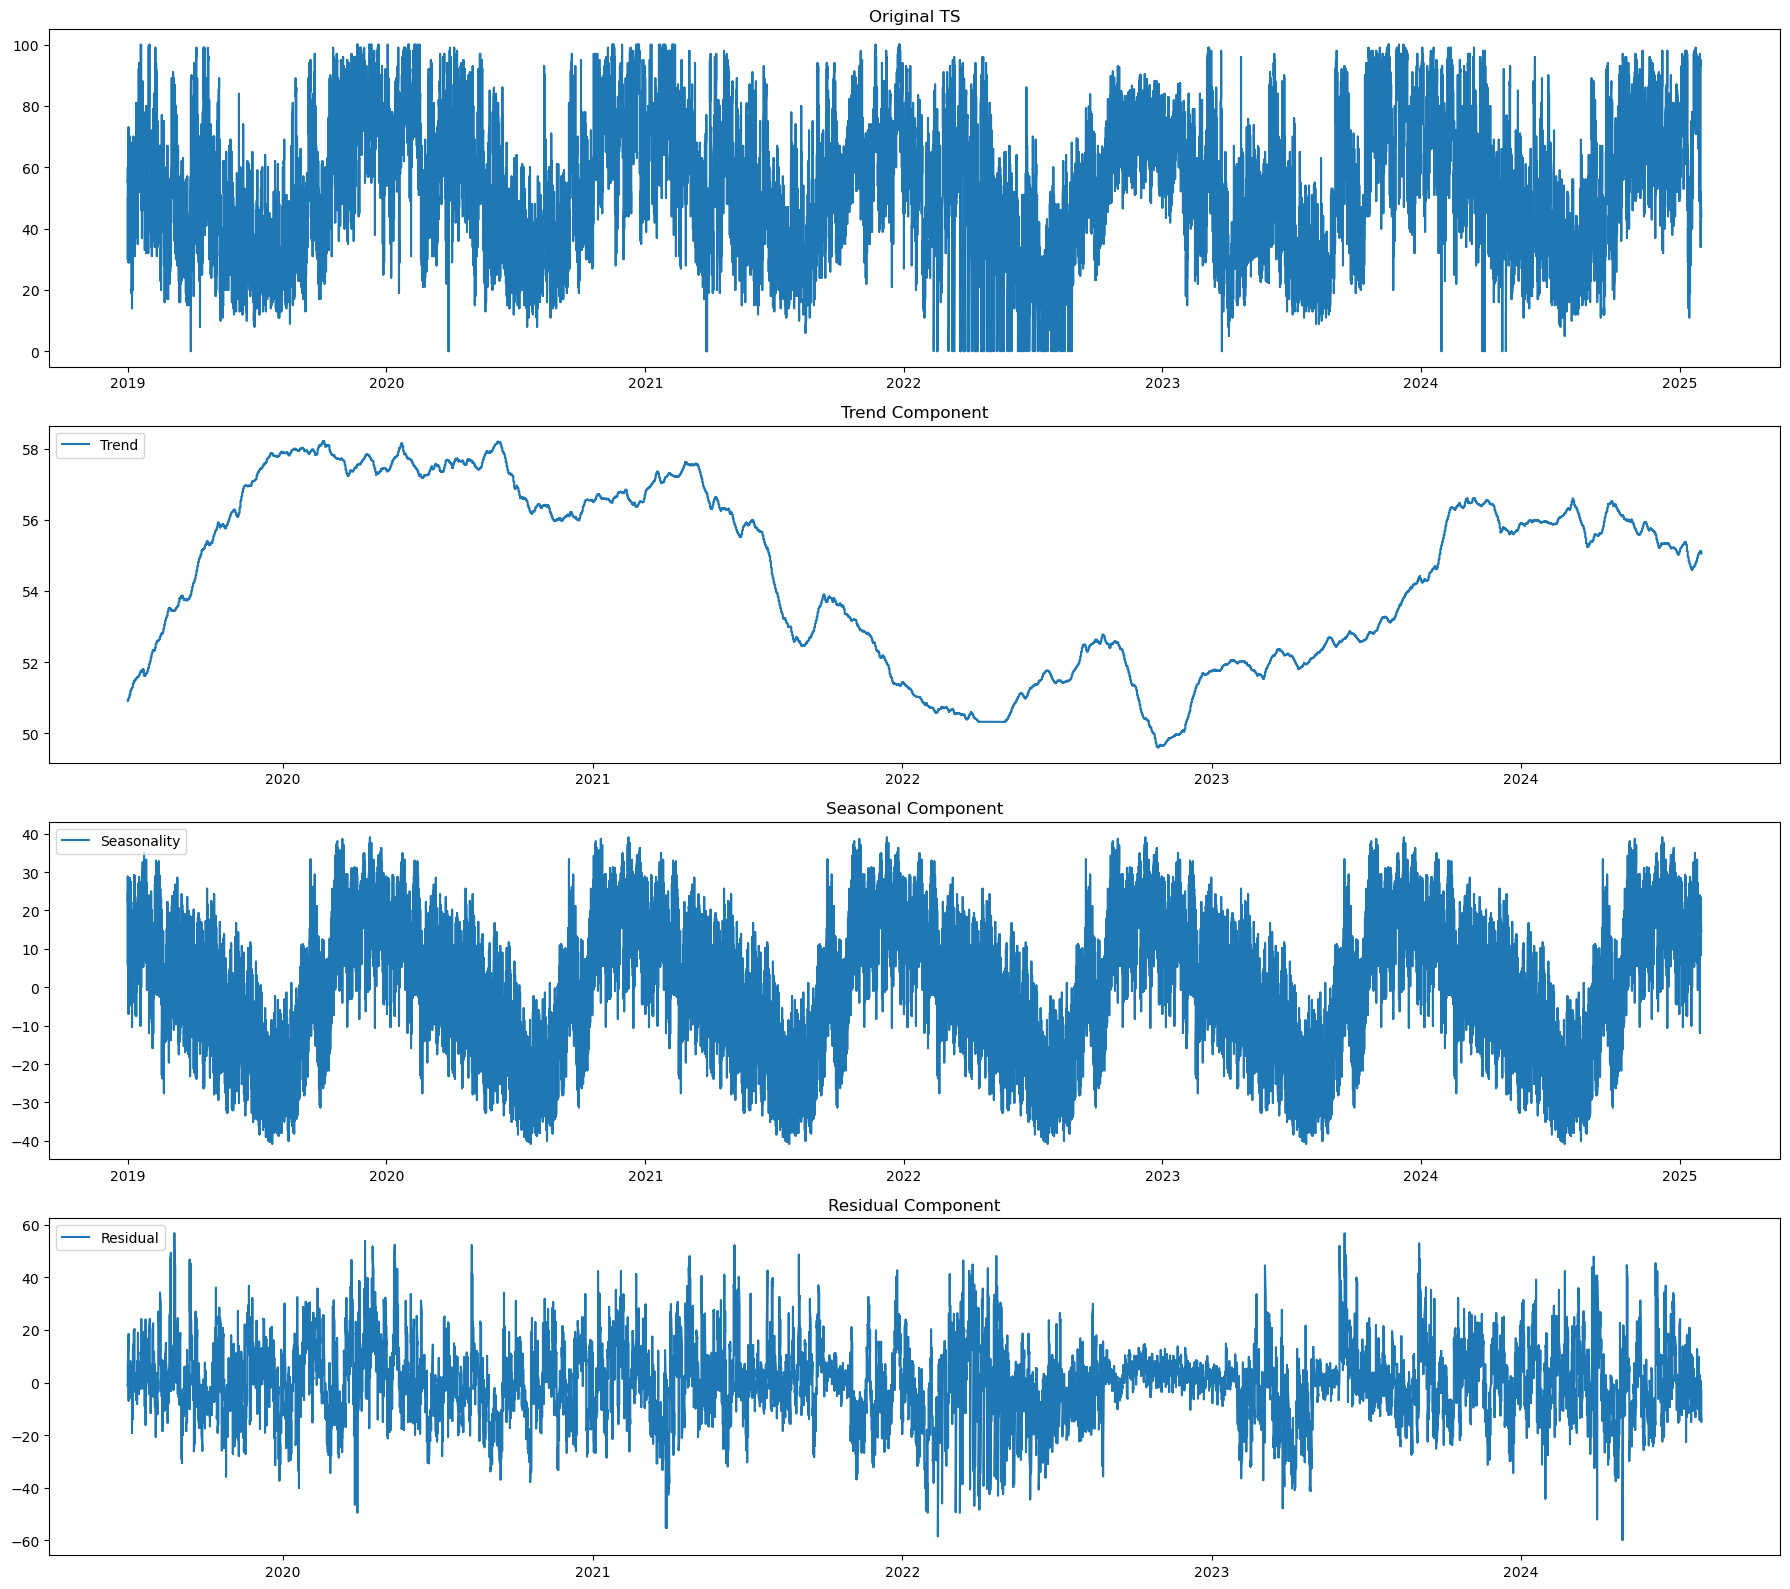

In [45]:
show_graphics(df=df, col='humedad_media', fecha='fecha')